### Problem Statement: Concrete Strength Prediction

 

### Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

 

### Resources Available 

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/.


### Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 #|Name|Data Type|Measurement|Description
-|-|-|-|-
1.|Cement (cement)|quantitative|kg in a m3 mixture|Input Variable
2.|Blast Furnace Slag (slag)|quantitative|kg in a m3 mixture|Input Variable
3.|Fly Ash (ash)|quantitative|kg in a m3 mixture|Input Variable
4.|Water(water)|quantitative|kg in a m3 mixture|Input Variable
5.|Superplasticizer (superplastic)|quantitative|kg in a m3 mixture|Input Variable
6.|Coarse Aggregate (coarseagg)|quantitative|kg in a m3 mixture|Input Variable
7.|Fine Aggregate (fineagg)|quantitative|kg in a m3 mixture|Input Variable
8.|Age(age)|quantitative|Day (1~365)|Input Variable
9.|Concrete compressive strength(strength)|quantitative|MPa|Output Variable

#### Alex N Waithera - Project 4 : Feature Engineering & Model Tuning 

### Exploratory Data Analysis (EDA)

In [1]:
#Import the libraries to use
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import copy
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
#Load and review data using pandas
df = pd.read_csv("concrete.csv")

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# Display statistical summary of the dataset
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


####  Observation:
- The dataset has about 1030 entries and nine(9) variables.
- All of the nine(9) variables are numerical.
- Based on the problem statement, our target variable is to predict the concrete strength which our target variable. 

In [4]:
# Display information and shape of the dataframe:  
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


(1030, 9)

In [5]:
# Check datatype
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
# Print non-null number of the movings ratings data
df.count()
#Check for any null values in the dataset
df.isnull().values.any()

False

In [7]:
# count number of missing values in each column
# sum True's
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
# Check the unique values in each column of the dataframe.
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [9]:
#Check datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observation: 
- The dataset has 1030 rows and nine(9) columns. 
- The 1030 entries are all float64 values with the exception of the 'age' column which has int64 values.  
- This dataset does not have any missing values, null values or duplicates.

### Univariate Analysis

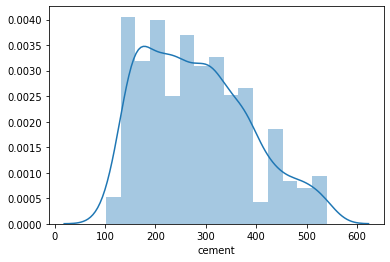

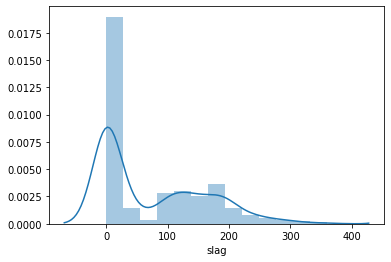

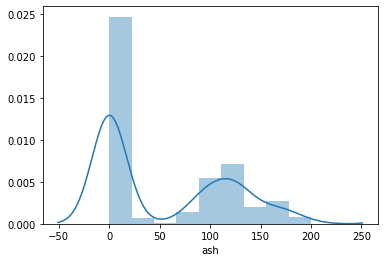

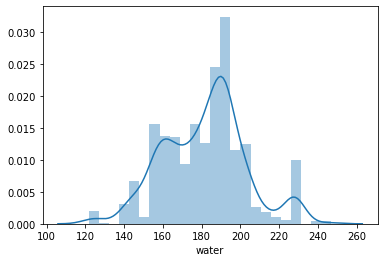

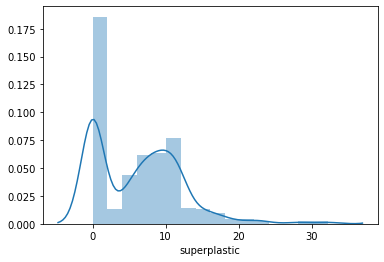

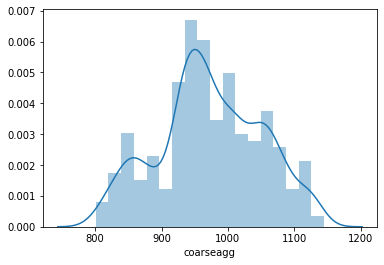

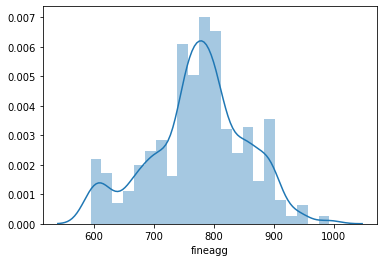

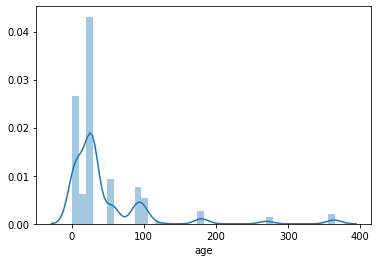

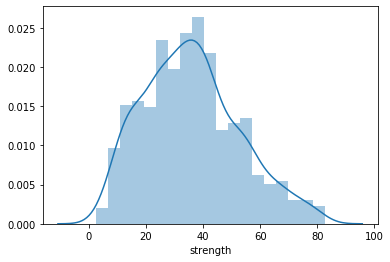

In [10]:
# Analyse data distribution in the continous variables using vizualization:  
for i in ['cement','slag','ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']:
    sns.distplot(df[i])
    plt.show()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Observations
- The 'cement' variable has a slight a normal distribution. Although, it is slightly skewed to the right. 
- The 'slag' variable is highly skewed to the right and showing a data imbalance with many points concentrated at zero. It has a few outliers in the range between 350 and 400.  
- The 'ash' variable is also highly skewed to the right with more data points concentrated at zero. It has a few outliers in the range between 240 and 250. 
- The 'water' variable has a normal distribution with a few outliers in the range between 240 and 260. 
- The 'superplastic' variable has a slight normal disribution and slightly skewed to the right. 
- The 'coarseagg' variable has a normal distribution. 
- The fineagg' variable has a normal distribution. 
- The 'age' variable is highly skewed to the right. 
- The 'strength' variable has a normal distribution. 

## Outlier treatment using median imputation

In [12]:
#Median imputation for outliers in 'slag', 'ash' & water variables
median_slag = df['slag'].median()

In [13]:
df["slag"] = df["slag"].mask(df["slag"] >350, median_slag)

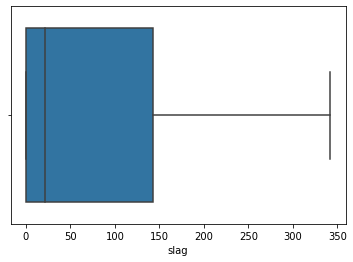

In [14]:
sns.boxplot(df['slag'])

In [15]:
median_ash = df["ash"].median()

In [16]:
df["ash"] = df["ash"].mask(df["ash"] >240, median_ash)

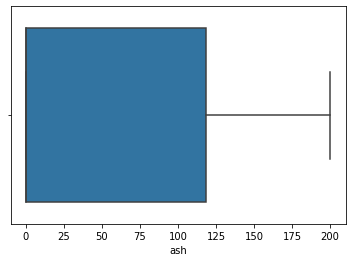

In [17]:
sns.boxplot(df['ash'])

In [18]:
median_water = df["water"].median()

In [19]:
df["water"] = df["water"].mask(df["water"] >225, median_water)

In [20]:
df["water"] = df["water"].mask(df["water"] <123, median_water)

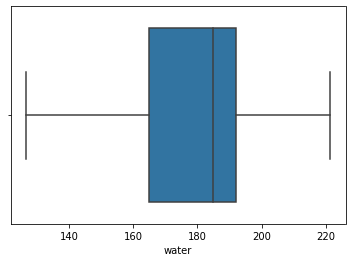

In [21]:
sns.boxplot(df['water'])

### Bivariate Analysis

- Bi-variate analysis between the predictor variables and target column. 

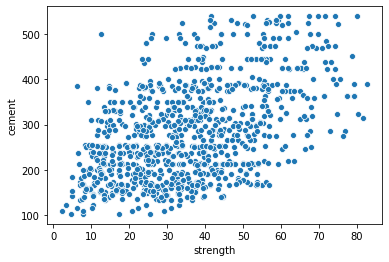

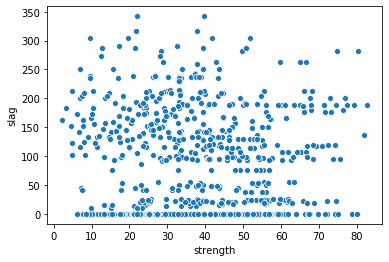

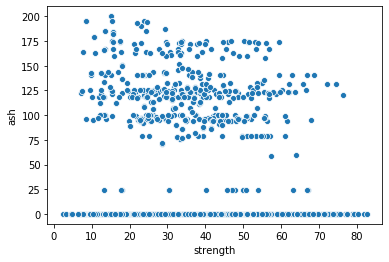

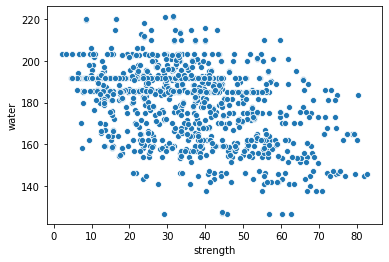

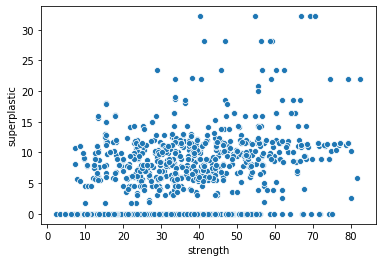

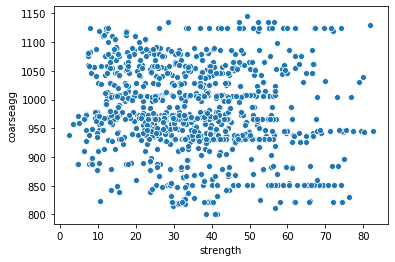

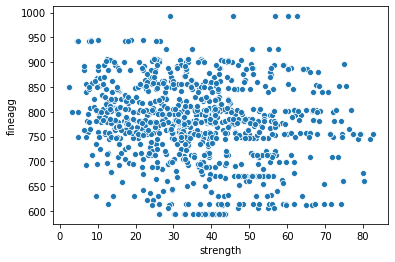

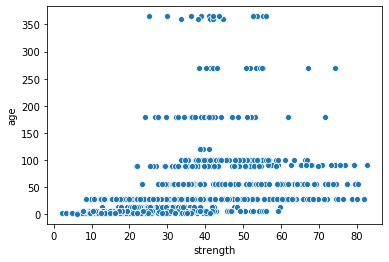

In [22]:
for i in ['cement','slag','ash','water','superplastic','coarseagg', 'fineagg', 'age']:
    sns.scatterplot(x='strength',y=i, data=df)
    plt.show()

### Observation
- The only relationship captured is that strength increases with increase in cement. The other independent variables have no relationship with the target variable. 


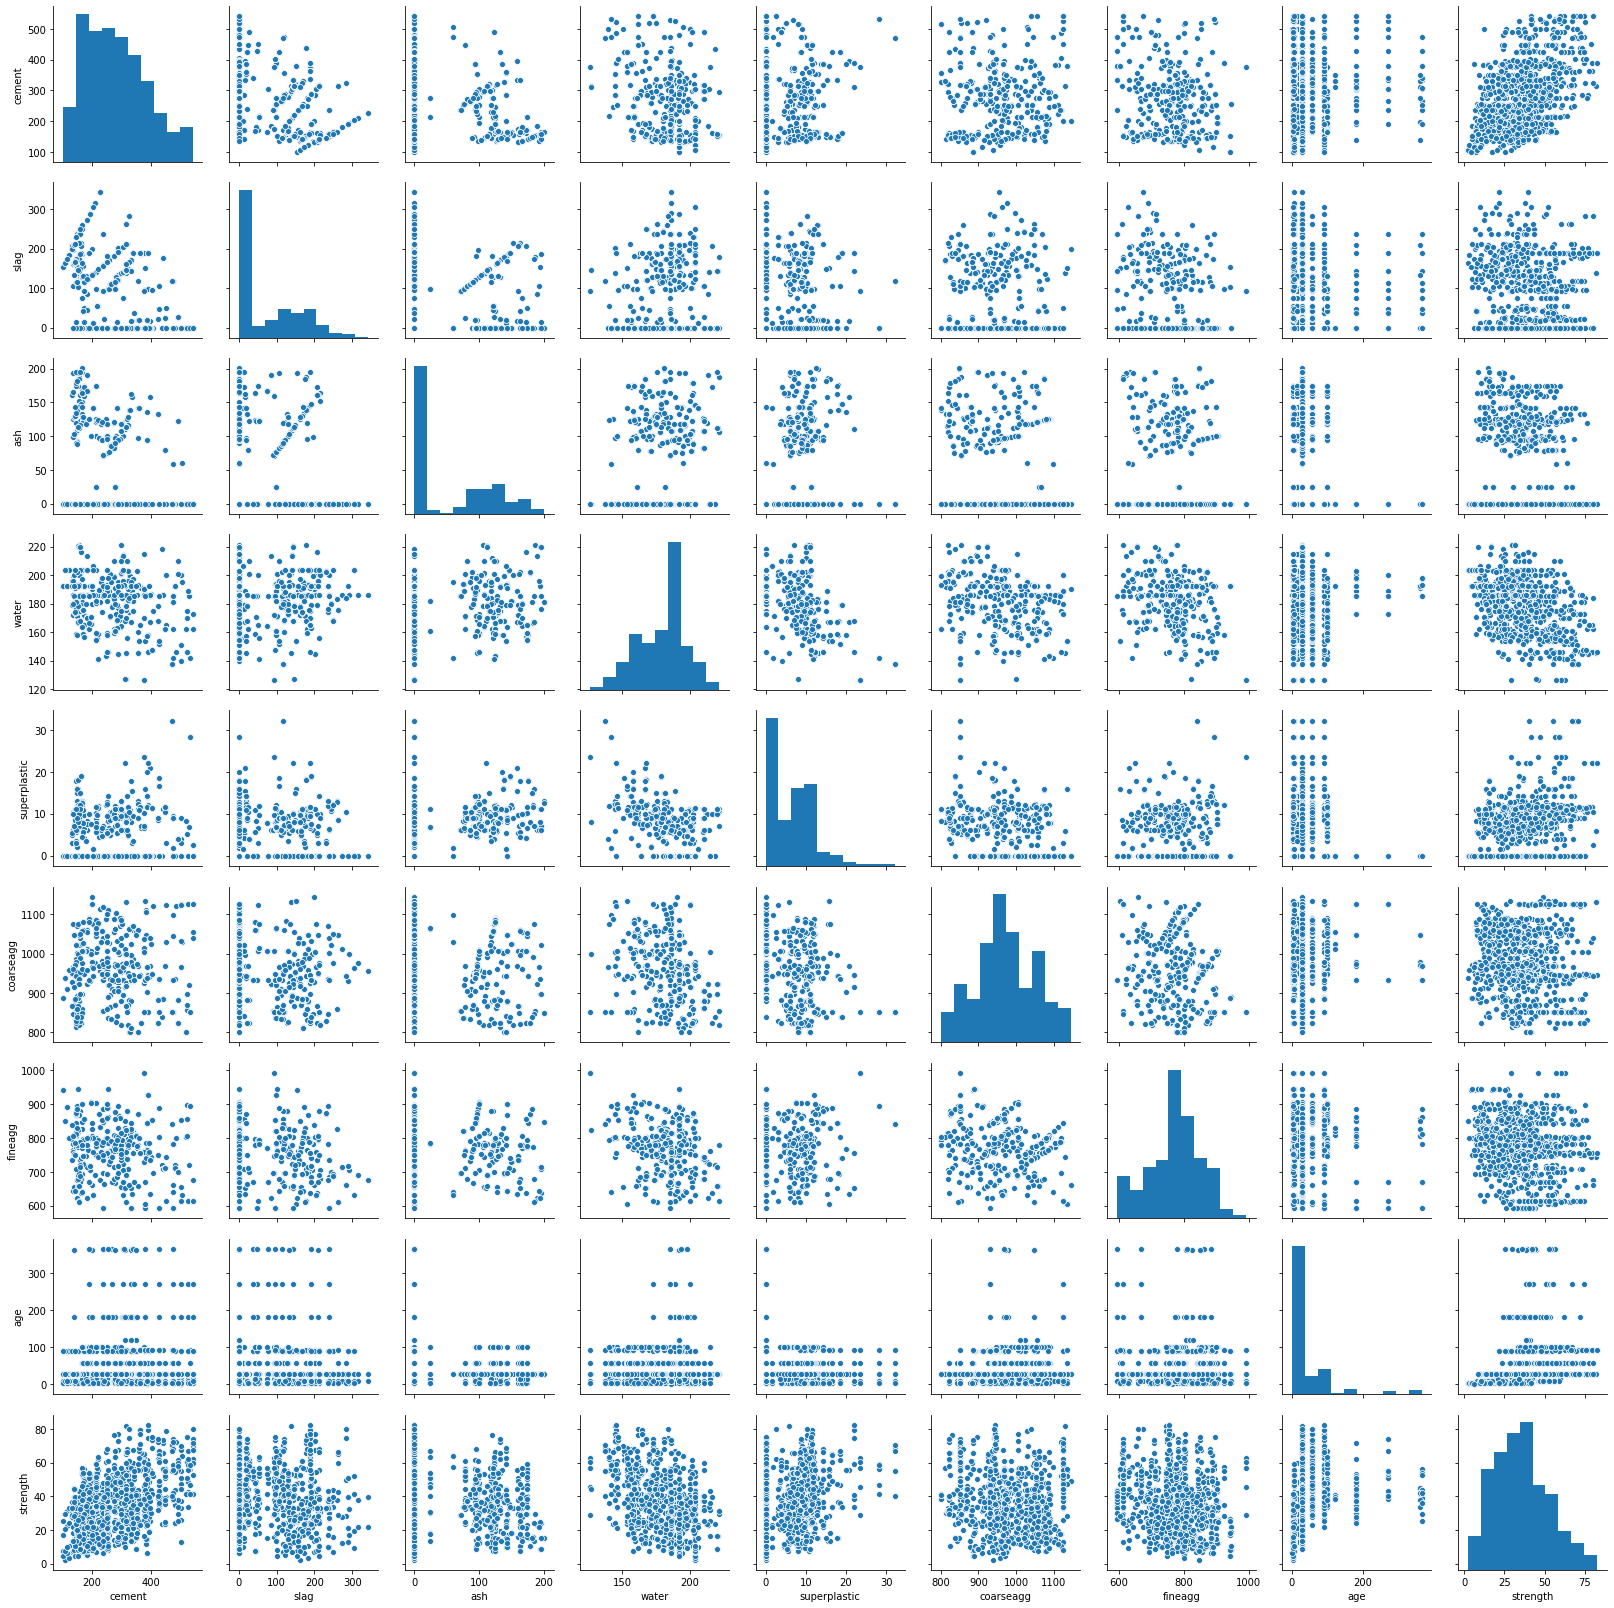

In [23]:
#pairplot 
sns.pairplot(df)

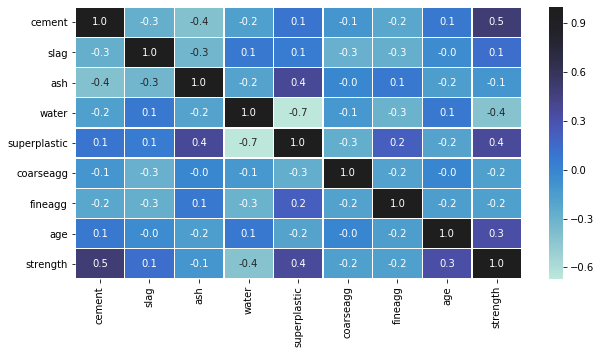

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Observations
- All the variables do not have any correlation with the target variable(strength) with the exception of 'cement' which has a weak positive correlation of 0.5. 
- superplastic and water independent variables have negative moderate correlation of 0.7. 
- fineagg and water independent variables have a negative weak correlation of 0.5. 
- As such, with very weak correlation among independent variables, there is no requirement to drop any of these variables. Also, we don't capture any opportunities for feature extraction. 

## Get the data model ready

In [25]:
# splitting data into training and test set for independent attributes
## Define X and Y variables
X = df.drop(['strength'], axis=1)
y = df[['strength']]

In [26]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Decide on the complexity of the model. 
Linear regression requires the relation between the dependent variable and the independent variable to be linear. However, the distribution of the data can be more complex causing non-linearity and  a simple linear model cannot fit such non-linear data. As such, we will run a simple linear model to see how the model will fit the data by checking the accuracy score and then add the polynomial effect by adding the 'degree' of the polynomial. In this regard the degree of two (2) was used because it has a higher accuracy score compared to degree 3 or 4 or 5. 

In [27]:
#Linear Regression model
from sklearn.linear_model import LinearRegression #importing linear regression

lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from Linear regression
score1 = lr.score(X_test, y_test)
score1

0.5805213483233094

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
score2 = poly_clf.score(X_test2, y_test)
score2

0.699881154241878

## Observation 
From the accuracy score, a quadratic curve is able to fit the data better than just the simple linear regression model. Computing the Accuracy score of the quadratic plot gives 0.6998 while the simple linear model gives an accuracy score of 0.5805. Hence we can decide that the complexity of this model should not be a simple linear model,but a quadratic or a higher degree model. 

## Models Creation 

Since linear regression models even after increasing the degree of complexity (polynomial effect) did not increase the accuracy score, we will create ensemble models, including Decision Tree, Random Forest, Bagging and Gradient Boosting and then select the best two(2) models based on their accuracy scores. 

In [29]:
# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.8624474252216787


In [30]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9064641634897427


In [31]:
# Bagging 
from sklearn.ensemble import BaggingRegressor

bgr = BaggingRegressor()
bgr = bgr.fit(X_train, y_train)
score5 = bgr.score(X_test, y_test)
pred = bgr.predict(X_test)

print(f"Bagging Regressor acccuracy score: {score5}")

Bagging Regressor acccuracy score: 0.8801826200034675


In [32]:
# Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr = gbr.fit(X_train, y_train)
score6 = gbr.score(X_test, y_test)
pred = gbr.predict(X_test)

print(f"GradientBoosting Regressor acccuracy score: {score6}")

GradientBoosting Regressor acccuracy score: 0.8890382455459361


## Kfold Cross Validation to Evaluate Model Performance. 

In [33]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score7 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score7}')

Cross validation score of Decision tree = 0.8678924186874808


In [34]:
from sklearn.model_selection import cross_val_score
#For Random Forest
score8 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random Forest = {score8}')

Cross validation score of Random Forest = 0.918044126925259


In [35]:
from sklearn.model_selection import cross_val_score
#For Bagging
score9 = cross_val_score(bgr, X, y, cv = 10).mean()
print(f'Cross validation score of Bagging Regressor = {score9}')

Cross validation score of Bagging Regressor = 0.9100788228588506


In [36]:
from sklearn.model_selection import cross_val_score
#For Gradient Boosting Regressor
score10 = cross_val_score(gbr, X, y, cv = 10).mean()
print(f'Cross validation score of Gradient Boosting Regressor = {score10}')

Cross validation score of Gradient Boosting Regressor = 0.9058449674632942


## Model Tuning Using RandomizedSearchCV

Hyperparameter tuning will be done only for RandomForest & Baggging regressors as their mean Cross Validation scores are better compared to other models. 

## Hyperparameter tuning for Random Forest model 

In [37]:
# Parameters currently in use by the Random Forest Regressor 

print(rf.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Defination of hyperparameters for Random Forest. 
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 16.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [49]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

#### Evaluate RandomizedSearchCV for Random Forest Model by selecting the best hyper parameters

In [50]:
rf = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)


score11 = cross_val_score(rf, X, y, cv = 10).mean()


score11

0.9245167128452769

### Hyperparameter tuning for Bagging Regressor model using RandomizedSearchCV

In [51]:
# Parameters currently in use by the Bagging Regressor 

print(bgr.get_params())

{'base_estimator': None, 'bootstrap': False, 'bootstrap_features': False, 'max_features': 7, 'max_samples': 0.5256534611559497, 'n_estimators': 89, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [52]:
#Random Search: Defining Parameters for the Bagging Regressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
params_bgr = {"n_estimators": sp_randint(50,200),
              "max_features":sp_randint(1,8),
              "max_samples": uniform(0.5,0.1),
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}

In [53]:
#Building and Fitting Model
# Building the Bagging Regressor mode and using RandomSearchCV and fitting it to train with train dataset. 

RS_bgr= RandomizedSearchCV(bgr, param_distributions=params_bgr,n_iter=120)
RS_bgr.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=BaggingRegressor(base_estimator=None,
                                              bootstrap=False,
                                              bootstrap_features=False,
                                              max_features=7,
                                              max_samples=0.5256534611559497,
                                              n_estimators=89, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
                   iid='deprecated', n_iter=120, n_jobs=None,
                   param_distributions={'bootstrap': [True, Fals...
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022B9FF60710>,
                                        'max_samples': <scipy.stats._di

In [54]:
RS_bgr.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 7,
 'max_samples': 0.5528678756517509,
 'n_estimators': 130}

In [57]:
bgr = BaggingRegressor(bootstrap = False,bootstrap_features = False, max_features = 7,max_samples = 0.5528678756517509,n_estimators= 130)


score12 = cross_val_score(bgr, X, y, cv = 10).mean()


score12

0.9125804217482077

#### DataFrame to compare models after hyperparameter tuning

In [58]:
data = {'Technique' : ['Linear Regression','Linear Model(Polynomial Effect)','Decision Tree','Random forest', 'Bagging','Gradient Boosting','Decision Tree (Cross Validation)','Random Forest (Cross Validation)','Bagging (Cross Validation)','Gradient Boosting(Cross Validation)','Model Tuning Using RandomSearch (Random Forest)','Model Tuning Using RandomSearch (Bagging Regressor)' ],
       'Score' : [score1, score2, score3, score4, score5, score6, score7,score8, score9, score10, score11, score12 ] }

result = pd.DataFrame(data)
result

,Technique,Score
0,Linear Regression,0.580521
1,Linear Model(Polynomial Effect),0.699881
2,Decision Tree,0.862447
3,Random forest,0.906464
4,Bagging,0.880183
5,Gradient Boosting,0.889038
6,Decision Tree (Cross Validation),0.867892
7,Random Forest (Cross Validation),0.918044
8,Bagging (Cross Validation),0.910079
9,Gradient Boosting(Cross Validation),0.905845


### Conclusion 
- The Random Forest Regressor is the best model in this particular case. It scores an initial accuracy score of 0.9064 before model perfomance evaluation through kfold cross validation and model tuning. 
- Model performance evaluation through kfold cross validation for Random Forest gives an accuracy score of 0.9180. 
- Model tuning for the Random Forest model using hyperparameter tuning using RandomizedSearchCV increases the accuracy score to 0.9245. RandomizedSearchCV was used instead of GridSearchCV for efficiency and computing speed it offers and also it does not conduct an exhaustive sampling which can be expensive eventhough it gives higher accuracy scores. Because of these reasons, RandomizedSearchCV was found more efficient in terms of speed and space. 
- The second highest model that scored high accuracy score is the Bagging Regressor with an accuracy score of 0.8802 before model evaluation using Kfold cross validation and hyperparameter tuning using RandomizedSearchCV. 
- Model evaluation of the Bagging regressor using kfold cross validation gave an accuracy score of 0.9101. Tuning the model through hyperparameter tuning using RandomizedSearchCV increase the accuracy score of the Bagging Regressor to 0.9126. 